In [1]:
%config IPCompleter.greedy=True
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
# import keras
dataset = "Dataset/"

In [2]:
os.listdir(dataset)

['Vehicle', 'finalFolder']

In [2]:
# mainImageData = os.listdir(dataset)
# mainImageData.sort()
sampleImageDataPath  = dataset + 'finalFolder/'

In [3]:
zero_image = os.listdir(sampleImageDataPath +"/"+'0')
# zero_image.sort()
zero_image[0]

'0_0_0_b_0_1030.png'

In [5]:
# imgPath = sampleImageDataPath +"0/" +zero_image[0]
imgPath = sampleImageDataPath +"0/" +'0_0_0_h_0_2895.png'

imgPath

'Dataset/finalFolder/0/0_0_0_h_0_2895.png'

### Showing the Image present in our dataset

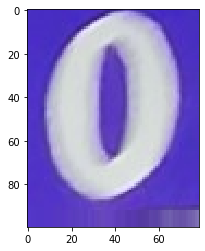

In [6]:
imgZero = cv2.imread(imgPath)
# cv2.imshow('zeroimage',imgZero)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(imgZero)

### Gray Scaling The Image

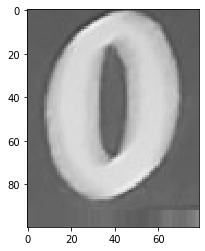

In [12]:
grayImage = cv2.cvtColor(imgZero,cv2.COLOR_BGR2GRAY)
# cv2.imshow('grayImage',grayImage)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(grayImage, cmap='gray', vmin=0, vmax=255)

## <a href='https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html'>About Thresholding </a>

### Applying Otsu Thresholding

True

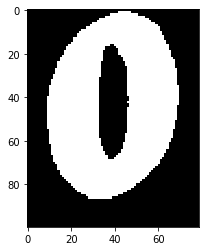

In [13]:
_,thresholdImage = cv2.threshold(grayImage,40,255,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
# cv2.imshow('thresholdImage',thresholdImage)
thresholdImage = np.array(thresholdImage)
plt.imshow(thresholdImage,cmap='gray', vmin=0, vmax=255)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imwrite('thresholdOfZero.png',thresholdImage)
# saveTo = 'Dataset/thresholdImages/teere'
# link=os.path.join(saveTo+'.png')
# print(link)
# cv2.imwrite(link,thresholdImage)


In [9]:
# thresholdImage=thresholdImage/255
# plt.imshow(thresholdImage,cmap='gray')

### Creating A function to obtain this thresholding and saving

In [14]:
def toThreshold(imgPath,destinationPath):
    try:
        initialImage = cv2.imread(imgPath)
        grayImage = cv2.cvtColor(initialImage,cv2.COLOR_BGR2GRAY)
        _,threshImage = cv2.threshold(grayImage,40,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#     print(destinationPath)

        newdestinationPath= os.path.join(destinationPath+'.png')
#     print(newdestinationPath)
        cv2.imwrite(newdestinationPath,threshImage)
    except Exception as e:
        pass
def create_A_Folder(folderPath):
    # creating a folder where all threshold Images a stored
    if not(os.path.exists(folderPath)):
        os.mkdir(folderPath)


In [15]:
# creating a folder where all threshold Images a stored

create_A_Folder(dataset+'thresholdImages')

destinationPath = dataset+'thresholdImages/'

print(destinationPath)


Dataset/thresholdImages/


In [16]:

# a
#Folder with character's

# allImagesDataset = ['gyanas_images','JandA','G_1','Babin_Character','niraj_img']
allImagesDataset = ['finalFolder']
for indexFolder,mainImageData in enumerate(allImagesDataset):
    
    label_Image_Folder = os.listdir(dataset+mainImageData)
    
    print(label_Image_Folder)
#     """
    for singleFolder in label_Image_Folder:
#         print(singleFolder)
        single_Folder_Path = dataset + mainImageData + "/" + singleFolder
#         print(single_Folder_Path)
        all_Image_In_Folder = os.listdir(single_Folder_Path)
#         i=0
        for index_at,singleImage in enumerate(all_Image_In_Folder):
            # Path of the single Image
            single_Image_Path = single_Folder_Path + '/'+singleImage
            # path of destination folder
            single_destination_folder = destinationPath + singleFolder 
#             print(single_destination_folder)
            create_A_Folder(single_destination_folder) # Creating A destionation Folder
            #Creating the name of the image file to save
            single_destination_Path = destinationPath + singleFolder + '/'+str(indexFolder)+"_"+str(index_at)
#             print(single_Image_Path)
#             print(single_destination_Path)
            toThreshold(single_Image_Path,single_destination_Path)
#             i+=1
#             if i==2:
#                 break
    # """

print("-----DONE---")


['0', '6', '4', '5', 'pa', '8', '7', '2', '9', 'BA', '3', '1']
-----DONE---
